# 統計分析筆記

## 2019-05-06

In [0]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#產生亂數資料(常態分配)
n1=2.5*np.random.randn(20)*6.25
n2=3.5*np.random.randn(20)*7.25
print(n1)
print(n2)

[  7.50978216   0.82690292   4.35089732 -35.71968833  -1.90620747
  -4.48039177   1.85609747  -7.31447469   7.31430015  -8.8406993
   3.72503784 -26.48549889  11.5991129   -2.48286649   7.45703192
  10.09639436 -21.95126782  -1.00531796 -10.32571727 -21.92960942]
[ 10.90006154   6.50959798   4.74637258  58.15005023 -19.1488561
 -11.30367166 -29.39136305  31.38697884 -35.54579584  19.42638681
   6.31222118  11.43224668 -24.68177941 -28.68777322  13.8018672
   9.53325166   9.1689732   11.72542299   4.56815166  -6.85739949]


In [0]:
#產生DataFrame
original=pd.DataFrame()
original['sample1']=n1
original['sample2']=n2

In [4]:
print(original.head())

     sample1    sample2
0   7.509782  10.900062
1   0.826903   6.509598
2   4.350897   4.746373
3 -35.719688  58.150050
4  -1.906207 -19.148856


# 敘述性統計

In [5]:
scipy.stats.describe(original.loc[:,'sample1'])

DescribeResult(nobs=20, minmax=(-35.719688330804715, 11.59911290048453), mean=-4.385309118679641, variance=171.7685569223673, skewness=-0.9352625801943688, kurtosis=-0.043476686131822984)

In [6]:
scipy.stats.describe(original.loc[:,'sample2'])

DescribeResult(nobs=20, minmax=(-35.54579583729373, 58.1500502276925), mean=2.102247188924031, variance=507.0857438126466, skewness=0.3101917344561834, kurtosis=0.3158064109993015)

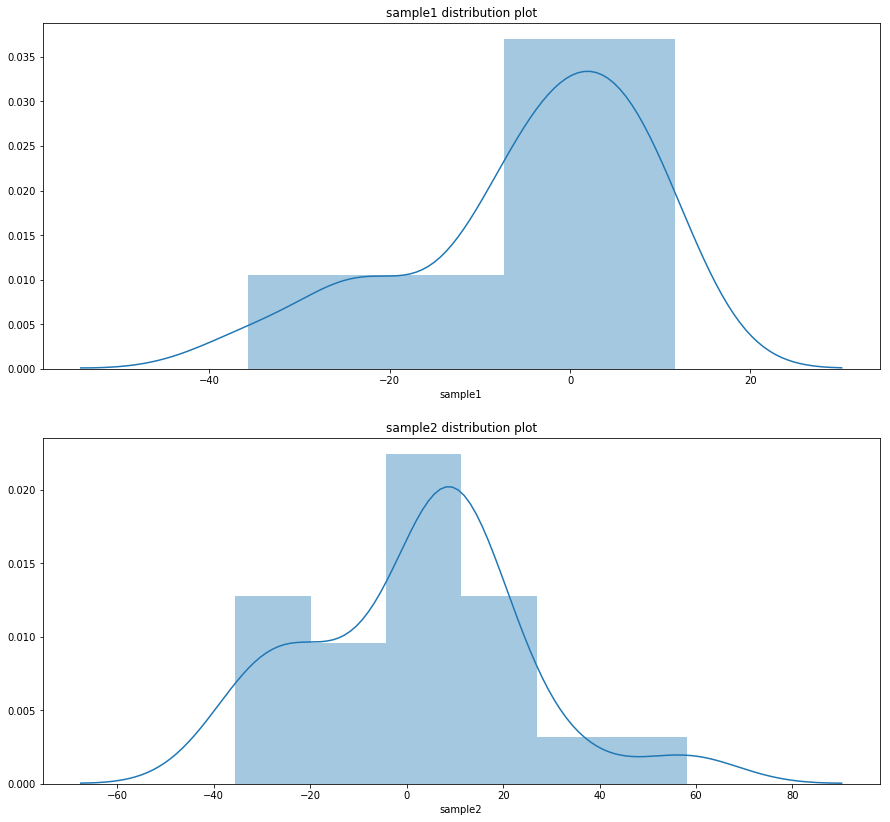

In [7]:
z0=plt.figure(figsize=(15,14))
z0.add_subplot(2,1,1)
sns.distplot(original.loc[:,'sample1'])
plt.title('sample1 distribution plot')
z0.add_subplot(2,1,2)
sns.distplot(original.loc[:,'sample2'])
plt.title('sample2 distribution plot')
plt.show()

# 敘述性統計

兩者皆為右偏,近似常態分配


# 信賴區間

標準誤=(樣本標準差)/(樣本數)^(1/2)

20為小樣本,使用t分配

In [8]:
sample1test=np.array(scipy.stats.ttest_1samp(original.loc[:,'sample1'],original.loc[:,'sample1'].mean()))
se=(original.loc[:,'sample1'].std()/math.sqrt(original.index.shape[0]))
print('sample1信賴區間:',original.loc[:,'sample1'].mean()-(sample1test[0]*se),'< 群體平均數 <',original.loc[:,'sample1'].mean()+(se*sample1test[1]))

sample1信賴區間: -4.3853091186796425 < 群體平均數 < -1.45470715899314


In [9]:
sample2test=np.array(scipy.stats.ttest_1samp(original.loc[:,'sample2'],original.loc[:,'sample2'].mean()))
se2=(original.loc[:,'sample2'].std()/math.sqrt(original.index.shape[0]))
print('sample2信賴區間:',original.loc[:,'sample2'].mean()-(sample2test[0]*se2),'< 群體平均數 <',original.loc[:,'sample2'].mean()+(se2*sample1test[1]))

sample2信賴區間: 2.1022471889240317 < 群體平均數 < 7.137551270171987


# 假說檢定

設sample1群體平均數為mu1,sample2群體平均數為mu2


H0:mu1=mu2


H1:mu1!=mu2


scipy的ttest_ind為雙尾檢定,檢測兩群體間的差異


In [10]:
scipy.stats.ttest_ind(original.loc[:,'sample1'],original.loc[:,'sample2'])

Ttest_indResult(statistic=-1.1135452026038468, pvalue=0.2724686314618812)

# 假說檢定

p-value 為 0.265,大於0.05,顯著

因此不棄卻H0